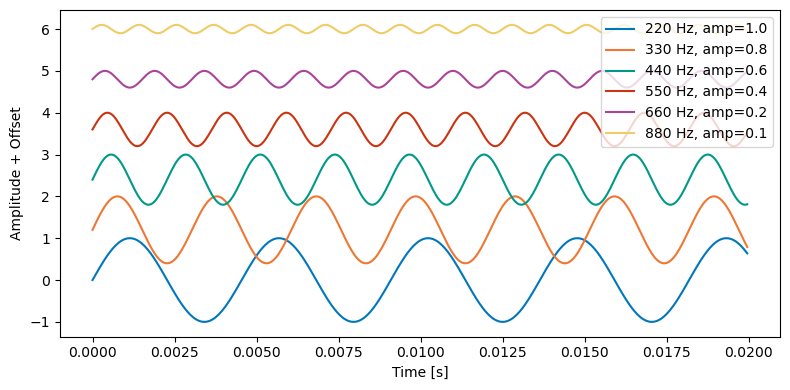

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# High contrast, colorblind-friendly color palette
colors = {
    'blue': '#0077BB',      # Strong blue
    'orange': '#EE7733',    # Orange
    'green': '#009988',     # Teal
    'red': '#CC3311',       # Red
    'purple': '#AA4499',    # Purple
    'yellow': '#EECC66'     # Light yellow
}

# (선택) 색맹 친화 스타일 - petroff10이 없으면 주석 처리
plt.style.use('tableau-colorblind10')
# plt.style.use('petroff10')

###############################################################################
# 1) 6개의 부분음(Partial) 정의: 주파수 + 진폭
###############################################################################
freqs = [220, 330, 440, 550, 660, 880]        # 예: A3, E4, A4, C#5, E5, A5
amps  = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]        # 단순 예시: 각 부분음 진폭 서서히 감소

sr = 22050                                    # 샘플링 레이트(22.05 kHz)
duration = 0.02                               # 0.02초(20ms)만 확인해서 파형이 단순
t = np.linspace(0, duration, int(sr*duration), endpoint=False)

###############################################################################
# 2) 각 부분음을 사인파로 생성. 서로 다른 색상 & 세로 오프셋
###############################################################################
signals = []
for f, a in zip(freqs, amps):
    # 부분음 신호: 사인파(진폭 a, 주파수 f)
    sig = a * np.sin(2 * np.pi * f * t)
    signals.append(sig)

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_title("Stacked Partials (Time Domain) - Simple Musical Waveform")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude + Offset")

color_keys = list(colors.keys())  # ['blue','orange','green','red','purple','yellow']

for i, sig in enumerate(signals):
    # 각 부분음을 세로로 조금씩 올려서 겹치지 않게 표현
    offset = i * 1.2  # 오프셋 값(1.2씩 위로 이동)
    ax.plot(t, sig + offset, color=colors[color_keys[i]],
            label=f"{freqs[i]} Hz, amp={amps[i]}")

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()
